In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student_sleep_patterns.csv')
df_test = pd.read_csv('student_sleep_patterns.csv')
df.head(10)

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
5,6,25,Other,1st Year,4.9,12.0,3.2,3,96,9,9.80,18.83,5.04,10.51
6,7,22,Female,2nd Year,6.5,11.7,3.4,1,99,6,13.05,20.96,8.58,10.81
7,8,22,Male,2nd Year,6.1,7.8,3.0,1,108,4,10.49,10.85,5.60,10.02
8,9,24,Female,1st Year,8.6,2.4,1.4,1,86,7,11.06,18.88,8.14,8.78
9,10,19,Other,2nd Year,5.8,8.2,2.0,3,44,8,14.65,5.31,7.47,9.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


In [4]:
print(df)

     Student_ID  Age  Gender University_Year  Sleep_Duration  Study_Hours  \
0             1   24   Other        2nd Year             7.7          7.9   
1             2   21    Male        1st Year             6.3          6.0   
2             3   22    Male        4th Year             5.1          6.7   
3             4   24   Other        4th Year             6.3          8.6   
4             5   20    Male        4th Year             4.7          2.7   
..          ...  ...     ...             ...             ...          ...   
495         496   24    Male        2nd Year             5.1          9.3   
496         497   20    Male        2nd Year             8.9          7.7   
497         498   21    Male        3rd Year             5.7          6.4   
498         499   18  Female        2nd Year             4.9          0.5   
499         500   21    Male        3rd Year             7.9         11.6   

     Screen_Time  Caffeine_Intake  Physical_Activity  Sleep_Quality  \
0   

In [5]:
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import OneHotEncoder as oe

In [6]:
df.isnull().sum()

Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

In [7]:
#encoding atribut gender dan univeristy year
df['Gender'] = le().fit_transform(df['Gender'])
df['University_Year'] = le().fit_transform(df['University_Year'])

# merubah sleep_start dan sleep_end menjadi format 24 jam
def convert_time_to_minutes(time):
    hours = int(time)
    minutes = (time - hours) * 60
    return hours * 60 + minutes

df['Weekday_Sleep_Start'] = df['Weekday_Sleep_Start'].apply(convert_time_to_minutes)
df['Weekday_Sleep_End'] = df['Weekday_Sleep_End'].apply(convert_time_to_minutes)
df['Weekend_Sleep_End'] = df['Weekend_Sleep_End'].apply(convert_time_to_minutes)
df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,2,1,7.7,7.9,3.4,2,37,10,849.6,4.05,444.6,423.6
1,2,21,1,0,6.3,6.0,1.9,5,74,2,523.8,7.10,492.6,612.6
2,3,22,1,3,5.1,6.7,3.9,5,53,5,1200.0,20.47,412.8,655.2
3,4,24,2,3,6.3,8.6,2.8,4,55,9,1189.2,4.08,401.4,565.2
4,5,20,1,3,4.7,2.7,2.7,0,85,3,1258.8,6.12,538.8,540.6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    int32  
 3   University_Year      500 non-null    int32  
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int32(2), int64(5)
memory usage: 50.9 KB


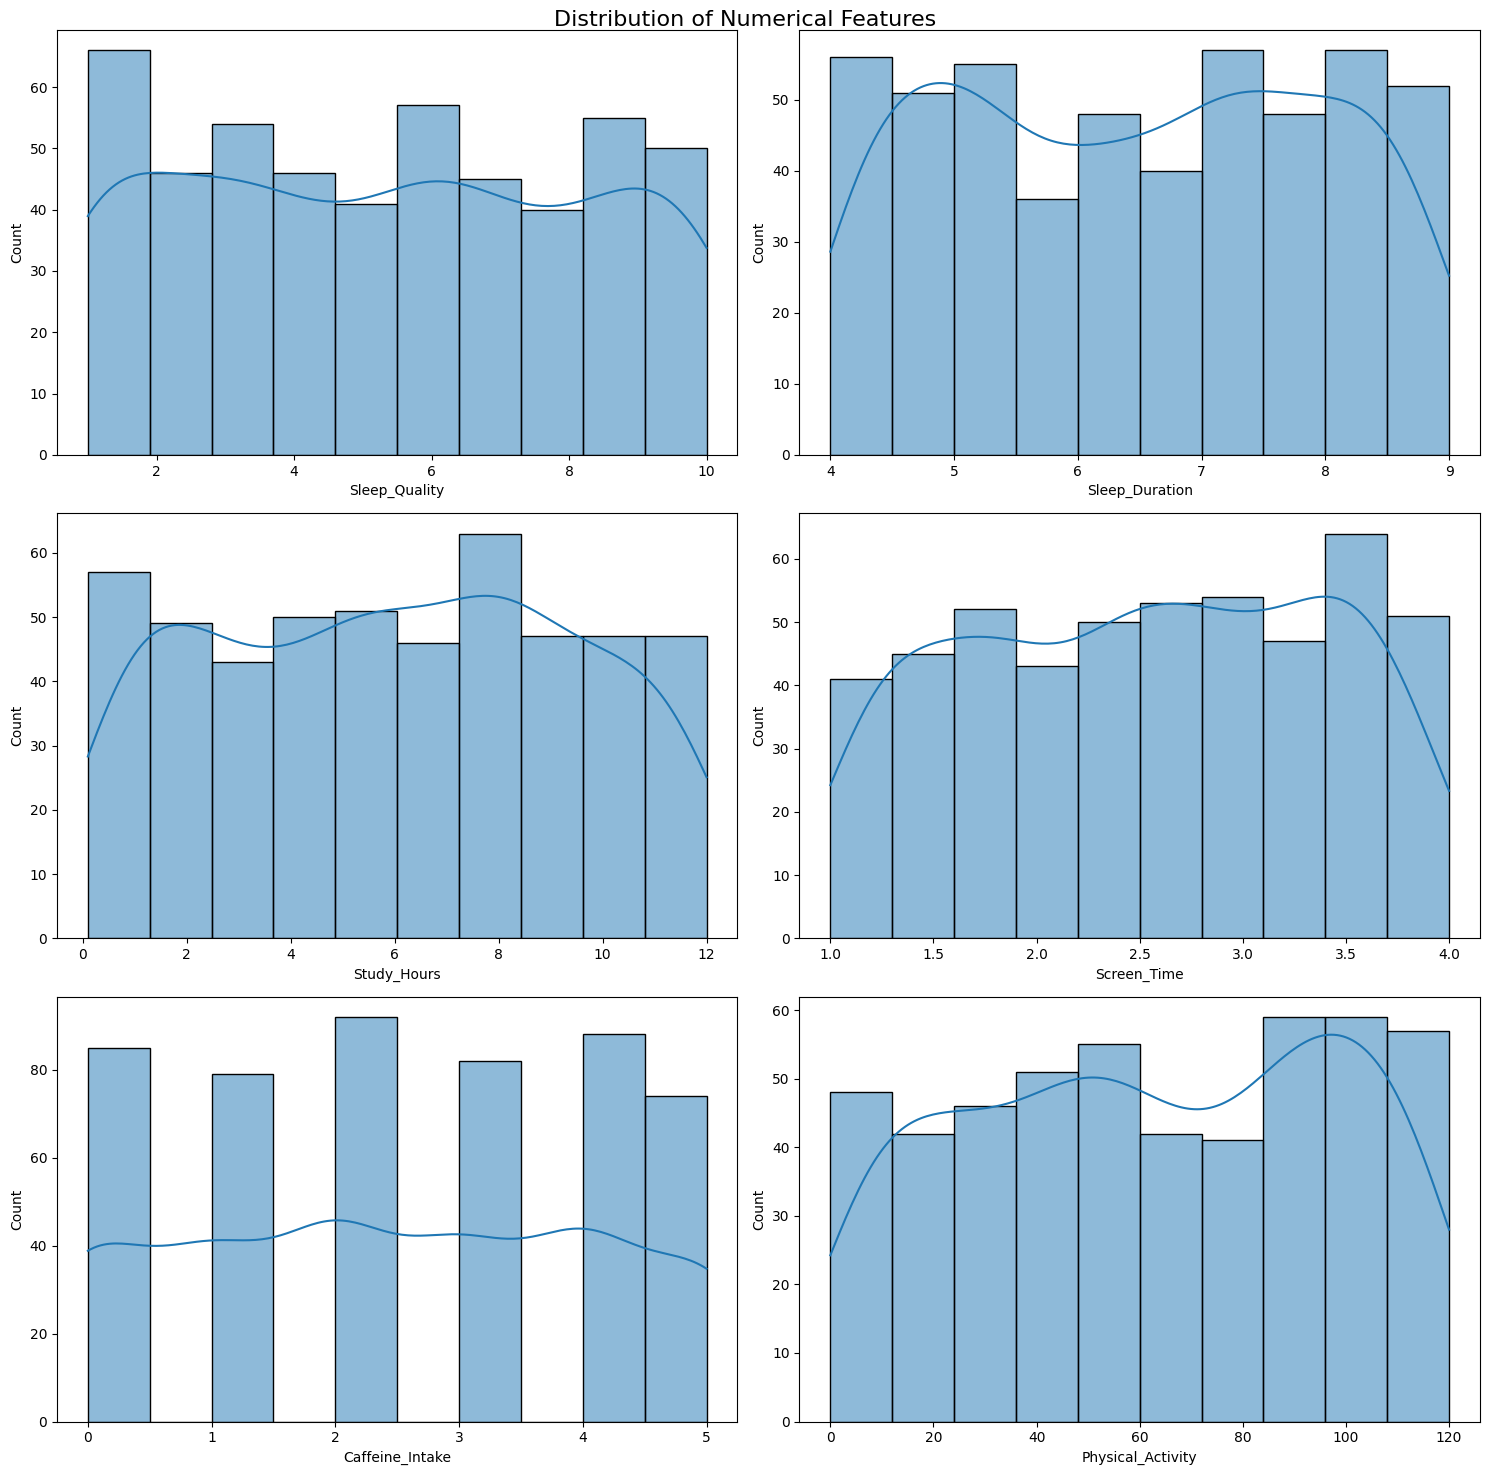

In [9]:
# Plotting distribution of numerical features
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(df['Sleep_Duration'], ax=axes[0, 1], kde=True)
sns.histplot(df['Study_Hours'], ax=axes[1, 0], kde=True)
sns.histplot(df['Screen_Time'], ax=axes[1, 1], kde=True)
sns.histplot(df['Caffeine_Intake'], ax=axes[2, 0], kde=True)
sns.histplot(df['Physical_Activity'], ax=axes[2, 1], kde=True)
sns.histplot(df['Sleep_Quality'], ax=axes[0, 0], kde=True)

fig.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

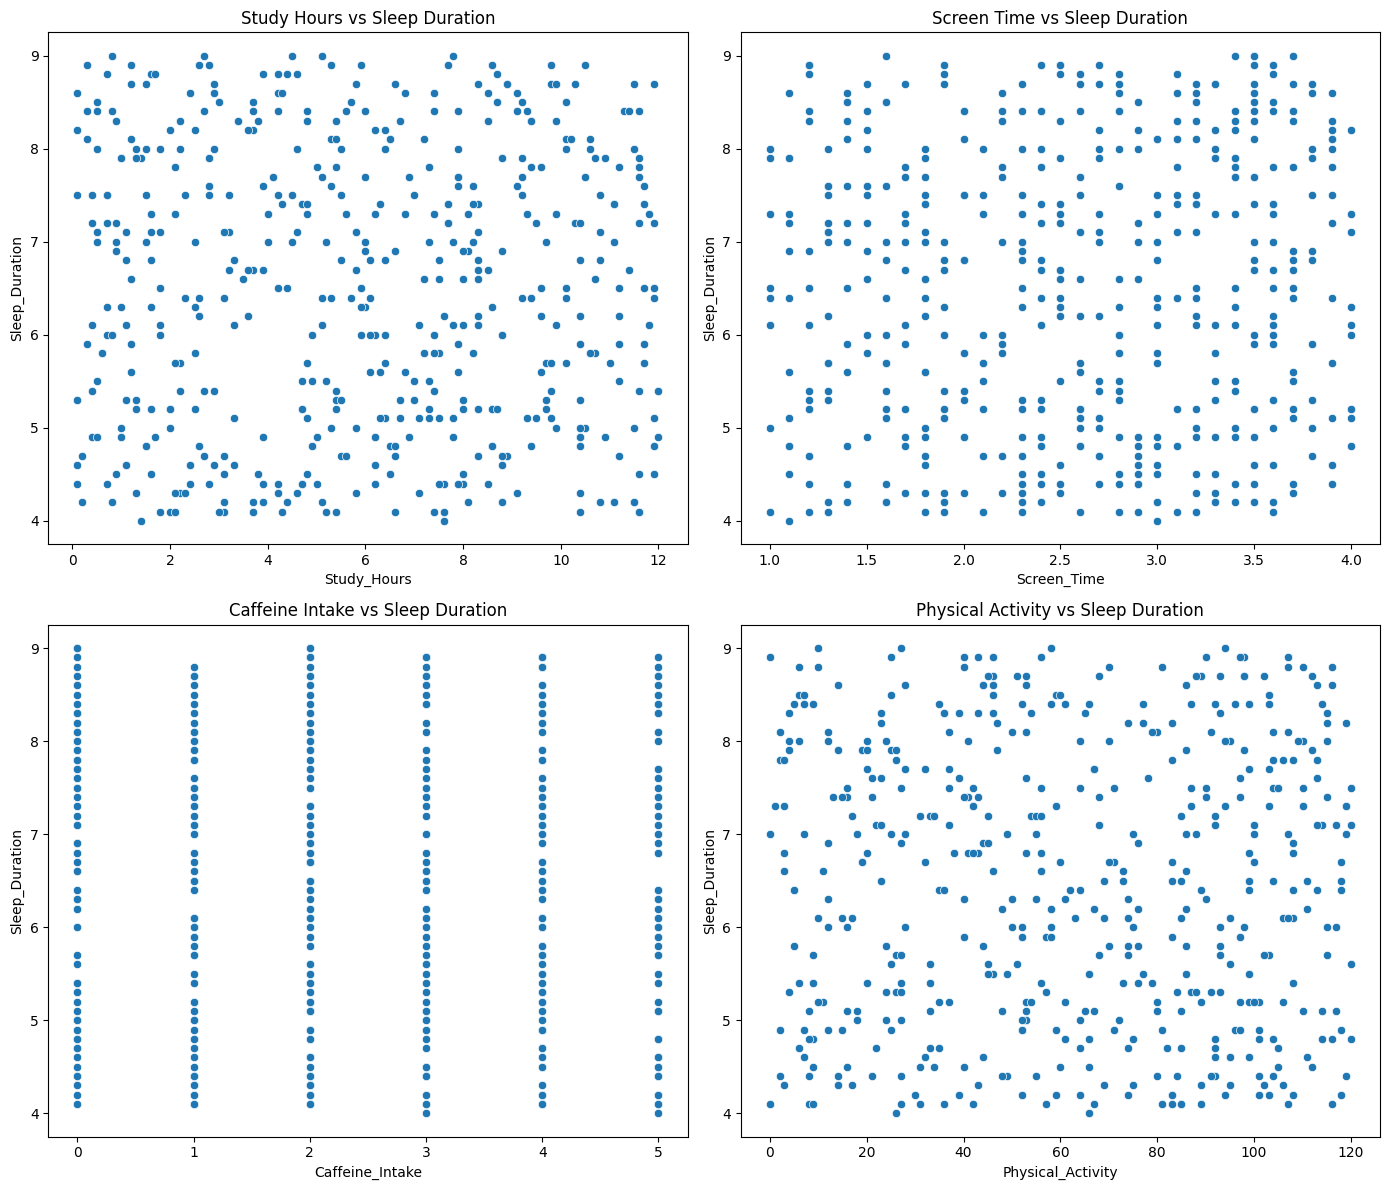

In [10]:
#hubungan Sleep_Duration dengan variable lainnya
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.scatterplot(x='Study_Hours', y='Sleep_Duration', data=df, ax=axes[0, 0])
sns.scatterplot(x='Screen_Time', y='Sleep_Duration', data=df, ax=axes[0, 1])
sns.scatterplot(x='Caffeine_Intake', y='Sleep_Duration', data=df, ax=axes[1, 0])
sns.scatterplot(x='Physical_Activity', y='Sleep_Duration', data=df, ax=axes[1, 1])

axes[0, 0].set_title('Study Hours vs Sleep Duration')
axes[0, 1].set_title('Screen Time vs Sleep Duration')
axes[1, 0].set_title('Caffeine Intake vs Sleep Duration')
axes[1, 1].set_title('Physical Activity vs Sleep Duration')

plt.tight_layout()
plt.show()

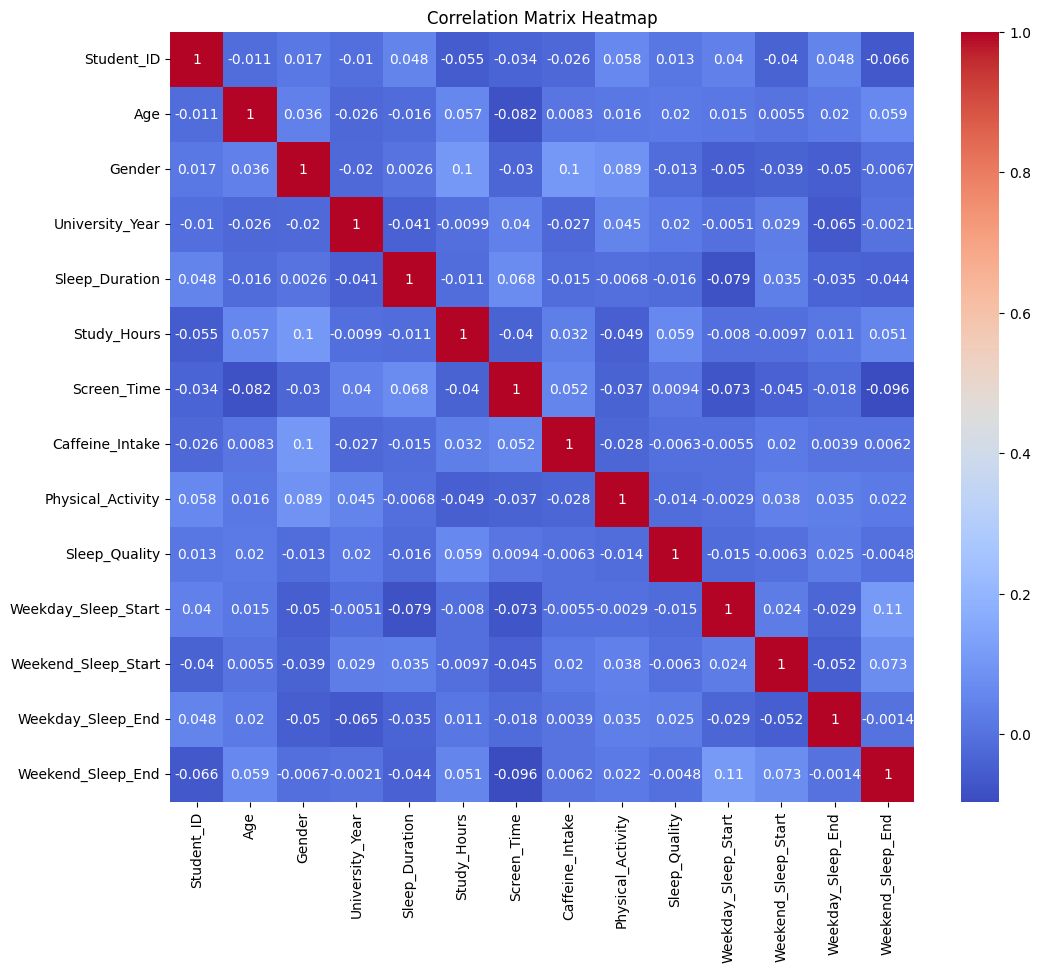

In [11]:
correlation_matrix = df.corr()

# Visualisasi Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
df_test.isnull().sum()

Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

In [13]:
#encoding atribut gender dan univeristy year pada df_test supaya lebih mudah dikenali
df_test['Gender'] = le().fit_transform(df_test['Gender'])
df_test['University_Year'] = le().fit_transform(df_test['University_Year'])

# merubah sleep_start dan sleep_end menjadi format 24 jam
def convert_time_to_minutes(time):
    hours = int(time)
    minutes = (time - hours) * 60
    return hours * 60 + minutes

df_test['Weekday_Sleep_Start'] = df_test['Weekday_Sleep_Start'].apply(convert_time_to_minutes)
df_test['Weekday_Sleep_End'] = df_test['Weekday_Sleep_End'].apply(convert_time_to_minutes)
df_test['Weekend_Sleep_End'] = df_test['Weekend_Sleep_End'].apply(convert_time_to_minutes)
df_test.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,2,1,7.7,7.9,3.4,2,37,10,849.6,4.05,444.6,423.6
1,2,21,1,0,6.3,6.0,1.9,5,74,2,523.8,7.10,492.6,612.6
2,3,22,1,3,5.1,6.7,3.9,5,53,5,1200.0,20.47,412.8,655.2
3,4,24,2,3,6.3,8.6,2.8,4,55,9,1189.2,4.08,401.4,565.2
4,5,20,1,3,4.7,2.7,2.7,0,85,3,1258.8,6.12,538.8,540.6


In [14]:
X = df.drop(['Sleep_Quality'], axis=1)
y = df['Sleep_Quality']

In [15]:

import optuna
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from hpelm import ELM


d:\UDINUS\semester 5\Data Mining\Project UAS\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
numerical_cols = ['Weekday_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity']
categorical_cols = ['Gender', 'University_Year']

In [17]:
X_numerical = X[numerical_cols]
X_categorical = X[categorical_cols]

In [18]:
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)

In [19]:
X_final = pd.concat([X_numerical, X_categorical_encoded], axis=1)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [21]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),  # Ganti dengan suggest_float(log=True)
        'depth': trial.suggest_int('depth', 4, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 0, 1),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'loss_function': 'MultiClass',
        'eval_metric': 'Accuracy',
        'logging_level': 'Silent',
        'random_seed': 42,  # Pastikan untuk mengganti SEED dengan nilai konkret jika belum didefinisikan
    }
    model = CatBoostClassifier(**params)

    # Melatih model
    model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=0, early_stopping_rounds=50)

    # Prediksi dan evaluasi
    preds = model.predict(X_val)
    accuracy = accuracy_score(y_val, preds)

    return accuracy


In [22]:
# Optimasi menggunakan Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Tampilkan parameter terbaik
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-12-30 21:47:54,824] A new study created in memory with name: no-name-4f44f2a6-b3c1-4ab4-9f93-23d6e962de61
[I 2024-12-30 21:48:11,754] Trial 0 finished with value: 0.15 and parameters: {'iterations': 154, 'learning_rate': 0.033422304017831965, 'depth': 11, 'l2_leaf_reg': 5.120574090131341, 'bagging_temperature': 0.48701715461132, 'random_strength': 0.1579288842726948, 'border_count': 190}. Best is trial 0 with value: 0.15.
[I 2024-12-30 21:48:12,316] Trial 1 finished with value: 0.18 and parameters: {'iterations': 763, 'learning_rate': 0.12364377998981542, 'depth': 6, 'l2_leaf_reg': 4.422597861882073, 'bagging_temperature': 0.35246075659654985, 'random_strength': 0.7036132456995264, 'border_count': 130}. Best is trial 1 with value: 0.18.
[I 2024-12-30 21:48:14,532] Trial 2 finished with value: 0.18 and parameters: {'iterations': 491, 'learning_rate': 0.01637835032572705, 'depth': 8, 'l2_leaf_reg': 7.05883489535504, 'bagging_temperature': 0.423299134607071, 'random_strength': 0.2

Best parameters: {'iterations': 892, 'learning_rate': 0.477904161956353, 'depth': 11, 'l2_leaf_reg': 5.842327557150551, 'bagging_temperature': 0.19092229715711595, 'random_strength': 0.06428921418508582, 'border_count': 173}
Best accuracy: 0.2


Train Catboost dengan parameter terbaik


In [23]:
model = CatBoostClassifier(**study.best_params)
model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=0, early_stopping_rounds=50)
y_pred_cat = model.predict(X_val)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Menghitung metrik
accuracy = accuracy_score(y_val, y_pred_cat)
precision = precision_score(y_val, y_pred_cat, average = 'macro')
recall = recall_score(y_val, y_pred_cat, average = 'macro')
f1 = f1_score(y_val, y_pred_cat, average = 'macro')
auc = roc_auc_score(y_val, model.predict_proba(X_val), multi_class='ovr')  # Menggunakan probabilitas untuk AUC

# Menampilkan hasil
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

Akurasi: 0.16
Presisi: 0.16
Recall: 0.13
F1-Score: 0.12
AUC: 0.53


Implementasi ELM

In [25]:
elm_model = ELM(X_train.shape[1], len(np.unique(y_train)), classification="c")
elm_model.add_neurons(50, "sigm")  # Adjust neurons based on experimentation
elm_model.train(X_train.values, pd.get_dummies(y_train).values)

Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons


d:\UDINUS\semester 5\Data Mining\Project UAS\.venv\Lib\site-packages\hpelm\nnets\slfn.py:62: RuntimeWarning: overflow encountered in exp
  self.func["sigm"] = lambda X, W, B: 1 / (1 + np.exp(np.dot(X, W) + B))
d:\UDINUS\semester 5\Data Mining\Project UAS\.venv\Lib\site-packages\hpelm\nnets\slfn_python.py:65: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = np.linalg.lstsq(HH, HT)[0]


In [26]:
y_pred = elm_model.predict(X_val.values)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)  # Assuming y_pred is one-hot encoded

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred_labels)
precision = precision_score(y_val, y_pred_labels, average='macro')  # or 'micro', 'weighted'
recall = recall_score(y_val, y_pred_labels, average='macro')  # or 'micro', 'weighted'
f1 = f1_score(y_val, y_pred_labels, average='macro')  # or 'micro', 'weighted'

# If you have a binary classification, you can calculate AUC
# For multiclass, you might need to use one-vs-rest approach
if len(np.unique(y_train)) == 2:  # Binary classification
    auc = roc_auc_score(y_val, y_pred[:, 1])  # Assuming the second column is the positive class
else:  # Multiclass classification
    auc = roc_auc_score(y_val, y_pred, multi_class='ovr')

# Display the results
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

Akurasi: 0.05
Presisi: 0.04
Recall: 0.06
F1-Score: 0.04
AUC: 0.50


d:\UDINUS\semester 5\Data Mining\Project UAS\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\UDINUS\semester 5\Data Mining\Project UAS\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
meta_learner = LogisticRegression()

In [28]:
final_predictions = []
for i in range(len(y_pred_labels)):
    # Hitung suara
    votes = [y_pred_labels[i].item(), y_pred_cat[i].item()]
    final_prediction = max(set(votes), key=votes.count)  # Voting
    final_predictions.append(final_prediction)

# 5. Evaluasi hasil
accuracy = accuracy_score(y_val, final_predictions)
print(f"Akurasi gabungan: {accuracy:.2f}")

Akurasi gabungan: 0.12


In [29]:
stacking_model = StackingClassifier(
    estimators=[
        ('catboost', model),
        ('elm', LogisticRegression())  # Use logistic regression as a proxy for ELM in sklearn
    ],
    final_estimator=meta_learner
)

In [30]:
stacking_model.fit(X_train, y_train)

0:	learn: 2.2274176	total: 268ms	remaining: 3m 58s
1:	learn: 2.1570489	total: 529ms	remaining: 3m 55s
2:	learn: 2.0869110	total: 789ms	remaining: 3m 53s
3:	learn: 2.0177789	total: 1.04s	remaining: 3m 52s
4:	learn: 1.9491252	total: 1.3s	remaining: 3m 51s
5:	learn: 1.8832154	total: 1.57s	remaining: 3m 51s
6:	learn: 1.8199408	total: 1.82s	remaining: 3m 50s
7:	learn: 1.7582799	total: 2.08s	remaining: 3m 49s
8:	learn: 1.6975941	total: 2.35s	remaining: 3m 50s
9:	learn: 1.6403448	total: 2.61s	remaining: 3m 50s
10:	learn: 1.5828130	total: 2.86s	remaining: 3m 49s
11:	learn: 1.5278506	total: 3.13s	remaining: 3m 49s
12:	learn: 1.4740605	total: 3.39s	remaining: 3m 49s
13:	learn: 1.4225973	total: 3.65s	remaining: 3m 49s
14:	learn: 1.3715417	total: 3.92s	remaining: 3m 49s
15:	learn: 1.3237030	total: 4.18s	remaining: 3m 49s
16:	learn: 1.2760901	total: 4.45s	remaining: 3m 48s
17:	learn: 1.2320023	total: 4.72s	remaining: 3m 49s
18:	learn: 1.1895396	total: 4.99s	remaining: 3m 49s
19:	learn: 1.1490513	to

d:\UDINUS\semester 5\Data Mining\Project UAS\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 2.2300714	total: 353ms	remaining: 5m 14s
1:	learn: 2.1610535	total: 672ms	remaining: 4m 59s
2:	learn: 2.0918136	total: 984ms	remaining: 4m 51s
3:	learn: 2.0223546	total: 1.34s	remaining: 4m 56s
4:	learn: 1.9554366	total: 1.7s	remaining: 5m 1s
5:	learn: 1.8901128	total: 2.05s	remaining: 5m 2s
6:	learn: 1.8253665	total: 2.41s	remaining: 5m 4s
7:	learn: 1.7628965	total: 2.75s	remaining: 5m 3s
8:	learn: 1.7020944	total: 3.05s	remaining: 4m 59s
9:	learn: 1.6427387	total: 3.39s	remaining: 4m 58s
10:	learn: 1.5863690	total: 3.76s	remaining: 5m 1s
11:	learn: 1.5329568	total: 4.1s	remaining: 5m
12:	learn: 1.4815249	total: 4.45s	remaining: 5m
13:	learn: 1.4279920	total: 4.89s	remaining: 5m 6s
14:	learn: 1.3772943	total: 5.28s	remaining: 5m 8s
15:	learn: 1.3276950	total: 5.6s	remaining: 5m 6s
16:	learn: 1.2812310	total: 5.94s	remaining: 5m 5s
17:	learn: 1.2351654	total: 6.28s	remaining: 5m 4s
18:	learn: 1.1925889	total: 6.58s	remaining: 5m 2s
19:	learn: 1.1497174	total: 6.88s	remaining:

KeyboardInterrupt: 

In [32]:
y_pred = stacking_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Stacking Model Accuracy:", accuracy)

Stacking Model Accuracy: 0.09


In [33]:


# Pisahkan kolom numerik dan kategorikal di test_df
X_test_numerical = df_test[numerical_cols]
X_test_categorical = df_test[categorical_cols]

# Lakukan One-Hot Encoding pada kolom kategorikal
X_test_categorical_encoded = pd.get_dummies(X_test_categorical, drop_first=True)

# Gabungkan kolom numerik dan hasil encoding kolom kategorikal
X_test_final = pd.concat([X_test_numerical, X_test_categorical_encoded], axis=1)

# Pastikan kolom-kolom pada X_test_final sesuai dengan kolom pada X_train
X_test_final = X_test_final.reindex(columns=X_train.columns, fill_value=0)

# Prediksi dengan model yang sudah dilatih
predictions = model.predict(X_test_final)

# Masukkan prediksi ke dalam test_df
df_test['Sleep_Quality'] = predictions

# Pilih hanya kolom 'id' dan 'Depression' untuk disimpan
output_df = df_test[['Student_ID', 'Sleep_Quality']]

# Simpan hasil prediksi ke dalam file CSV
output_df.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv


In [40]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data_test = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [41]:
data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [42]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [43]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [44]:
data.duplicated().sum()

0

In [45]:
df.fillna({'Sleep Disorder':'Nann'},inplace = True)

In [46]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64